## Our goal is to predict the number of Deaths as the number of covid positive patients increases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = 10,12
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/mishal/Documents/datasets/covid dataset/data.csv')
statedf = pd.read_csv('/home/mishal/Documents/datasets/covid dataset/Latest Covid-19 India Status.csv')
statedf.head(5)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7566,6,7431,129,0.08,98.22,1.70
1,Andhra Pradesh,2014116,14693,1985566,13857,0.73,98.58,0.69
2,Arunachal Pradesh,53031,863,51908,260,1.63,97.88,0.49
3,Assam,589426,6901,576865,5660,1.17,97.87,0.96
4,Bihar,725708,100,715955,9653,0.01,98.66,1.33


In [3]:
df.head()

,cases_time_series/dailyconfirmed,cases_time_series/dailydeceased,cases_time_series/dailyrecovered,cases_time_series/date,cases_time_series/dateymd,cases_time_series/totalconfirmed,cases_time_series/totaldeceased,cases_time_series/totalrecovered,statewise/active,statewise/confirmed,...,tested/totalindividualsregistered,tested/totalindividualstested,tested/totalpositivecases,tested/totalrtpcrsamplescollectedicmrapplication,tested/totalsamplestested,tested/totalsessionsconducted,tested/totalvaccineconsumptionincludingwastage,tested/updatetimestamp,tested/years1stdose,tested/years2nddose
0,1,0,0,30 January 2020,2020-01-30,1,0,0,363849.0,32249900.0,...,NaN,5900.0,78.0,NaN,6500.0,NaN,NaN,13/03/2020 00:00:00,NaN,NaN
1,0,0,0,31 January 2020,2020-01-31,1,0,0,1.0,7549.0,...,NaN,12235.0,150.0,NaN,13125.0,NaN,NaN,18/03/2020 18:00:00,NaN,NaN
2,0,0,0,1 February 2020,2020-02-01,1,0,0,17218.0,1994606.0,...,NaN,12426.0,168.0,NaN,13316.0,NaN,NaN,19/03/2020 10:00:00,NaN,NaN
3,1,0,0,2 February 2020,2020-02-02,2,0,0,1836.0,51513.0,...,NaN,13285.0,182.0,NaN,14175.0,NaN,NaN,19/03/2020 18:00:00,NaN,NaN
4,1,0,0,3 February 2020,2020-02-03,3,0,0,7707.0,580657.0,...,NaN,13486.0,206.0,NaN,14376.0,NaN,NaN,20/03/2020 10:00:00,NaN,NaN


In [4]:
#for finding the total number of cases
df['total cases'] = df['cases_time_series/totalconfirmed']
total_cases = df['total cases'].sum()
df ['total deaths'] = df['cases_time_series/totaldeceased']
total_deaths = df['total deaths'].sum()
df ['total cured'] = df['cases_time_series/dailyrecovered']
total_cured = df['total cured'].sum()
print (total_cases,"total number of confirmed cases")
print (total_deaths,"toal number of deaths")
print(total_cured,"total number of cured patients")

5644344246 total number of confirmed cases
75786240 toal number of deaths
31441089 total number of cured patients


In [5]:
# Now lets chech which state has the highest number of active cases
df2 = statedf.drop(columns=['Active Ratio (%)','Discharge Ratio (%)','Death Ratio (%)','Discharged','Deaths','Total Cases'])
#gu=vgsales.drop(columns=['Global_Sales','EU_Sales','Other_Sales','NA_Sales','JP_Sales'])
df3 = df2.groupby('State/UTs')['Active'].sum().sort_values(ascending=False).to_frame()
df3.style.background_gradient(cmap='Reds')

,Active
State/UTs,
Kerala,219441
Maharashtra,54763
Karnataka,18412
Tamil Nadu,16850
Andhra Pradesh,14693
Mizoram,8885
West Bengal,8815
Assam,6901
Odisha,6546


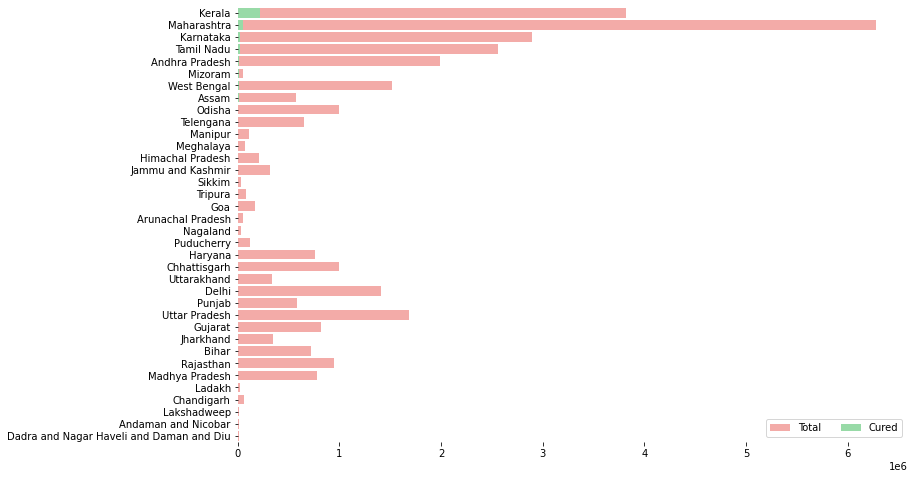

In [6]:
f, ax = plt.subplots(figsize=(12,8))
data = statedf[['State/UTs','Deaths','Active','Discharged']]
data.sort_values('Active',ascending=False, inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x='Discharged',y='State/UTs',data=data,label='Total',color='r')
sns.barplot(x='Active',y='State/UTs',data=data,label='Cured',color='g')
#legend
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="")
sns.despine(left="True",bottom="True")

# This shows the daily confirmed cases

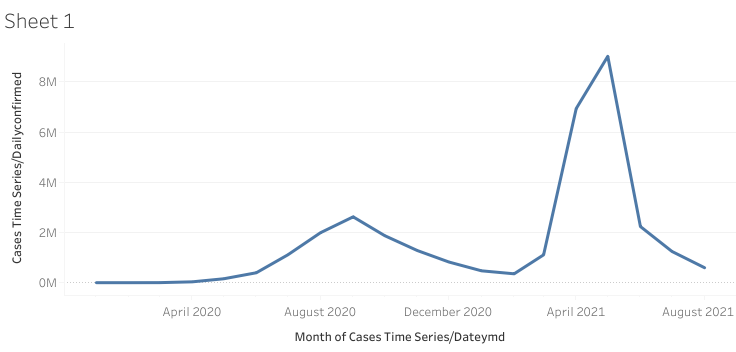

# This graph shows the daily deceased victims

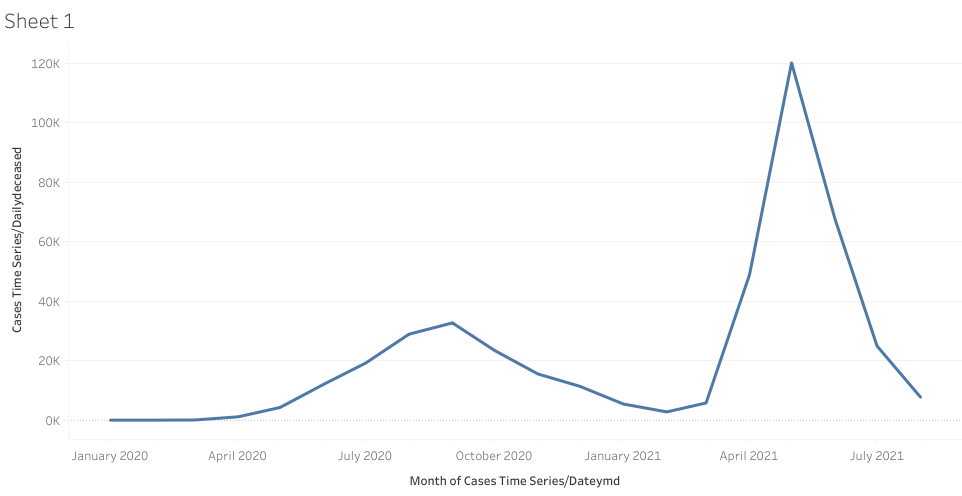

<AxesSubplot:>

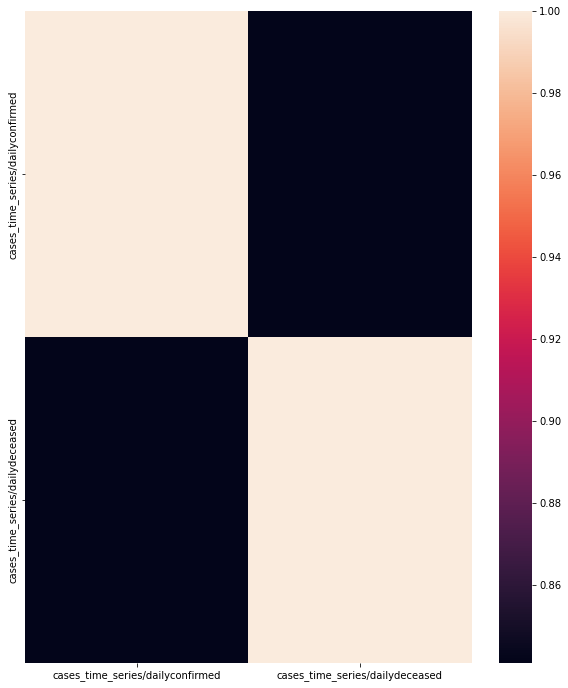

In [7]:
#df = df_data
df_data = df [['cases_time_series/dateymd','cases_time_series/dailyconfirmed','cases_time_series/dailydeceased']]#,'JP_Sales','Other_Sales','Global_Sales']]
sns.heatmap(df_data.corr())
#this heatmap shows the direact correlation between the daily confirmed cases and daily deceased cases

In [8]:
total = pd.DataFrame(df_data['cases_time_series/dailyconfirmed'])
deaths = pd.DataFrame(df_data['cases_time_series/dailydeceased'])
lm = linear_model.LinearRegression()
model = lm.fit(total,deaths)

In [9]:
model.coef_

array([[0.01047592]])

In [10]:
model.intercept_

array([165.79993794])

In [11]:
model.score(total,deaths)

0.707115055317873

our model score is 70, now lets try to increase it 

In [12]:
x = pd.DataFrame(df_data['cases_time_series/dailyconfirmed'])
y = pd.DataFrame(df_data['cases_time_series/dailydeceased'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [13]:
model.score(x_train,y_train) # for training the model 

0.6991910923436594

In [14]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)
model.score(x_test,y_test)

0.7426627972582138

In [15]:
# now our model score is 82.9 from 70

In [16]:
#Prediting a new vlaue
total_new=888
death_predict=model.predict(np.array(total_new).reshape(-1, 1))#converting an scalar to 2d array
death_predict
#the model predicts that if 888 people get infected with covid there is 83% chance that 175 people may die.``

array([[175.10255372]])